In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import numpy as np
import IPython.display as display

In [6]:
! pwd

/home/yiyi/Documents/ss2019/superresoluton/notebooks


In [7]:
records_dir = '/home/yiyi/Documents/ss2019/superresoluton/data/interim/tf_records'

In [45]:
filename = records_dir + '/test_aug.record'

In [46]:
filenames=[filename]
raw_data = tf.data.TFRecordDataset(filenames)
raw_data

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [47]:
for raw_record in raw_data.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example)
    

features {
  feature {
    key: "image/encoded"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\010\006\006\007\006\005\010\007\007\007\t\t\010\n\014\024\r\014\013\013\014\031\022\023\017\024\035\032\037\036\035\032\034\034 $.\' \",#\034\034(7),01444\037\'9=82<.342\377\333\000C\001\t\t\t\014\013\014\030\r\r\0302!\034!22222222222222222222222222222222222222222222222222\377\300\000\021\010\002\000\002\000\003\001\"\000\002\021\001\003\021\001\377\304\000\037\000\000\001\005\001\001\001\001\001\001\000\000\000\000\000\000\000\000\001\002\003\004\005\006\007\010\t\n\013\377\304\000\265\020\000\002\001\003\003\002\004\003\005\005\004\004\000\000\001}\001\002\003\000\004\021\005\022!1A\006\023Qa\007\"q\0242\201\221\241\010#B\261\301\025R\321\360$3br\202\t\n\026\027\030\031\032%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\203\204\205\206\207\210\211\212\222\223\224\225\226\227\230\231\232\242\243\244\245\246\

In [48]:
size =1
length=0

image_feature_description={
        'image/height':tf.io.FixedLenFeature([], tf.int64),
        'image/width': tf.io.FixedLenFeature([], tf.int64),
        'image/filename': tf.io.FixedLenFeature([], tf.string),
        'image/source_id': tf.io.FixedLenFeature([], tf.string),
        'image/encoded': tf.io.FixedLenFeature([], tf.string),
        'image/format': tf.io.FixedLenFeature([], tf.string),
        'image/object/bbox/xmin': tf.io.FixedLenFeature([length], tf.float32),
        'image/object/bbox/xmax': tf.io.FixedLenFeature([length], tf.float32),
        'image/object/bbox/ymin': tf.io.FixedLenFeature([length], tf.float32),
        'image/object/bbox/ymax': tf.io.FixedLenFeature([length], tf.float32),
        'image/object/class/text': tf.io.FixedLenFeature([size], tf.string),
        'image/object/class/label': tf.io.FixedLenFeature([size], tf.int64),
    }

In [49]:
def _parse_image_function(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_data.map(_parse_image_function)
parsed_image_dataset

<MapDataset shapes: {image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/bbox/xmax: (0,), image/object/bbox/xmin: (0,), image/object/bbox/ymax: (0,), image/object/bbox/ymin: (0,), image/object/class/label: (1,), image/object/class/text: (1,), image/source_id: (), image/width: ()}, types: {image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/object/class/text: tf.string, image/source_id: tf.string, image/width: tf.int64}>

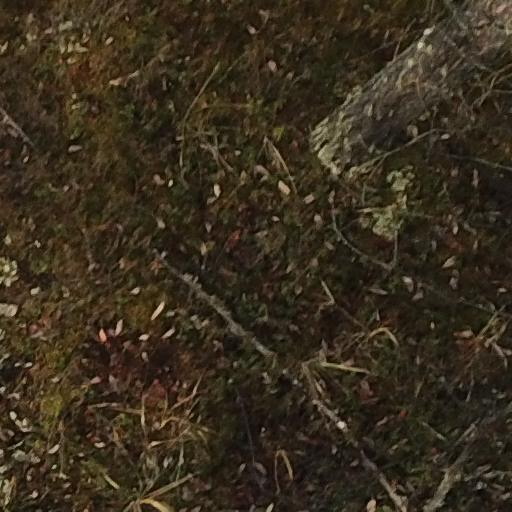

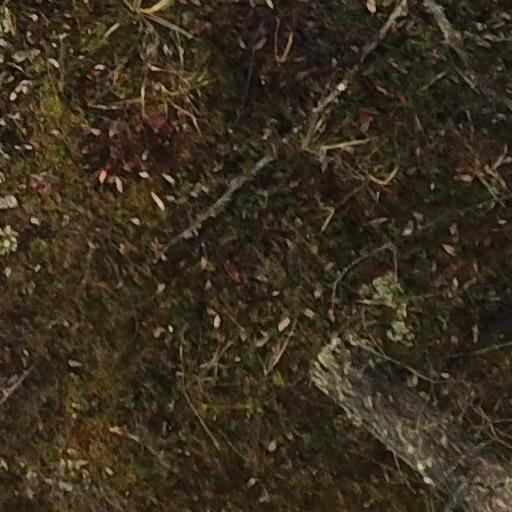

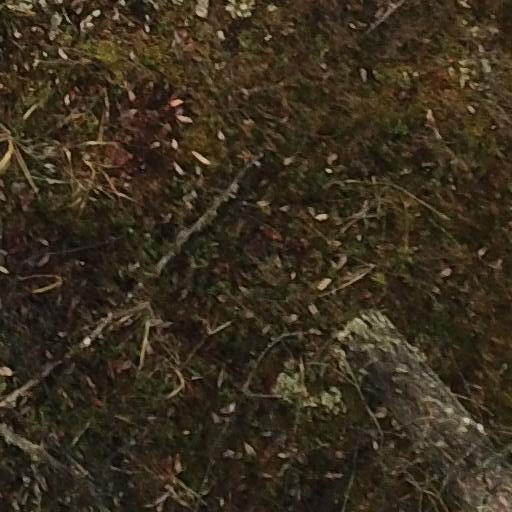

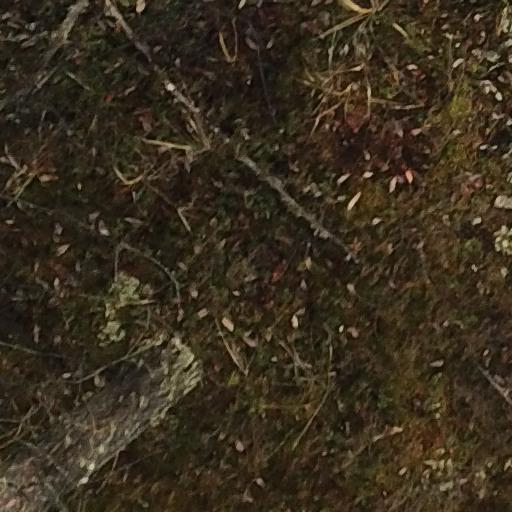

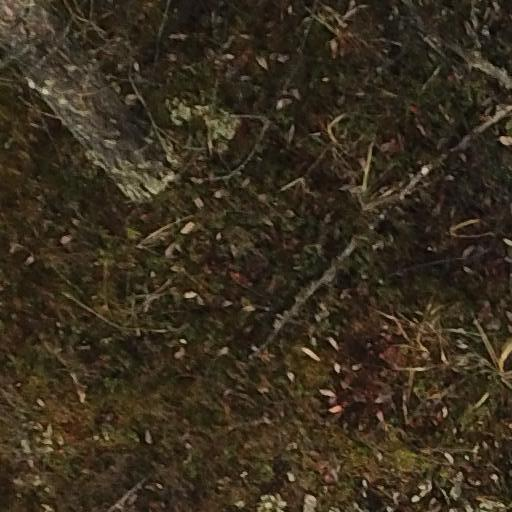

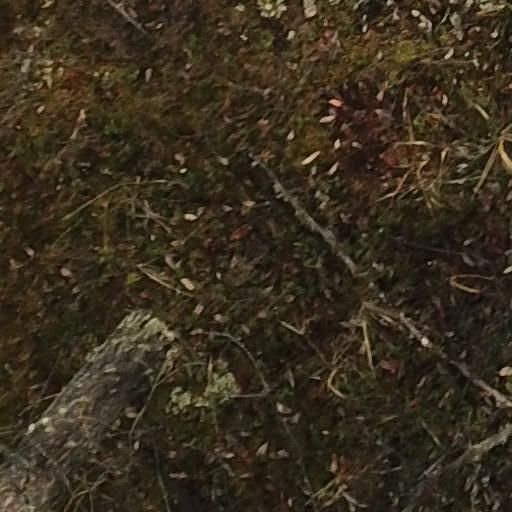

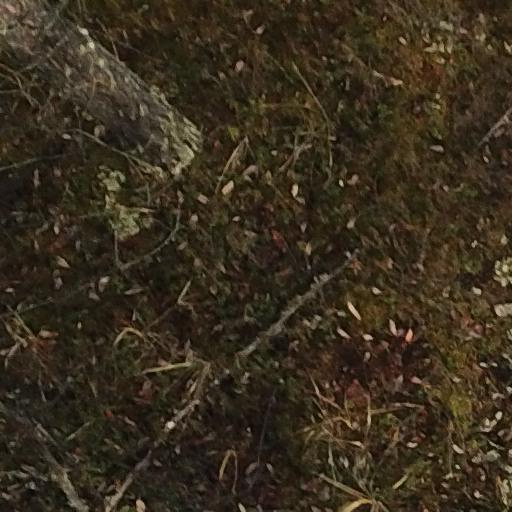

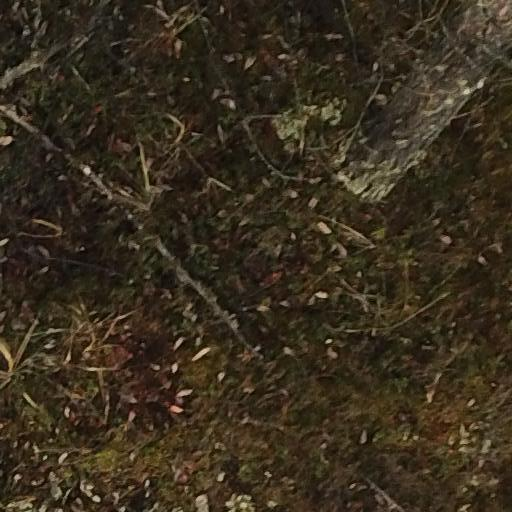

InvalidArgumentError: Key: image/object/bbox/xmax.  Can't parse serialized Example.
	 [[{{node ParseSingleExample/ParseSingleExample}}]] [Op:IteratorGetNextSync]

In [50]:
for image_features in parsed_image_dataset:
    image_raw = image_features['image/encoded'].numpy()
    display.display(display.Image(data=image_raw))